Perform an appropriate hypothesis test to determine the p-value, and hence result, of whether to reject or fail to reject **the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as men's**. Use a 10% significance level.

For this analysis, you'll use Official FIFA World Cup matches since 2002-01-01, and you'll also assume that each match is fully independent, i.e., team form is ignored.

The p-value and the result of the test must be stored in a dictionary called result_dict in the form:

result_dict = {"p_val": p_val, "result": result}

where p_val is the p-value and result is either the string "fail to reject" or "reject", depending on the result of the test.

In [1]:
# Start your code here!
import pandas as pd
import pingouin
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configure
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [2]:
# Read data
women_results = pd.read_csv('data/women_results.csv',index_col='date',parse_dates=True)
men_results = pd.read_csv('data/men_results.csv',index_col='date',parse_dates=True)

print(women_results.head())
print(men_results.head())

            Unnamed: 0 home_team  away_team  home_score  away_score  \
date                                                                  
1969-11-01           0     Italy     France           1           0   
1969-11-01           1   Denmark    England           4           3   
1969-11-02           2   England     France           2           0   
1969-11-02           3     Italy    Denmark           3           1   
1975-08-25           4  Thailand  Australia           3           2   

                  tournament  
date                          
1969-11-01              Euro  
1969-11-01              Euro  
1969-11-02              Euro  
1969-11-02              Euro  
1975-08-25  AFC Championship  
            Unnamed: 0 home_team away_team  home_score  away_score tournament
date                                                                         
1872-11-30           0  Scotland   England           0           0   Friendly
1873-03-08           1   England  Scotland         

In [3]:
# Remove meaningless columns
women_res = women_results.drop(columns='Unnamed: 0')
men_res = men_results.drop(columns='Unnamed: 0')

In [4]:
# Inspect
print(women_res.info())
print(men_res.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4884 entries, 1969-11-01 to 2022-07-31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   home_team   4884 non-null   object
 1   away_team   4884 non-null   object
 2   home_score  4884 non-null   int64 
 3   away_score  4884 non-null   int64 
 4   tournament  4884 non-null   object
dtypes: int64(2), object(3)
memory usage: 228.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44353 entries, 1872-11-30 to 2022-12-18
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   home_team   44353 non-null  object
 1   away_team   44353 non-null  object
 2   home_score  44353 non-null  int64 
 3   away_score  44353 non-null  int64 
 4   tournament  44353 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.0+ MB
None


In [5]:
# # Inspect
# print(women_res['tournament'].unique(),'\n')
# print(men_res['tournament'].unique())

In [6]:
# Subset the data to the wanted range
# Subset: =='FIFA World Cup'
women_res = women_res[women_res['tournament']=='FIFA World Cup']
men_res = men_res[men_res['tournament']=='FIFA World Cup']

# Subset: <'2002-01-01'
women_res = women_res.loc['2002-01-01':]
men_res = men_res.loc['2002-01-01':]

In [7]:
# Inspect
print(women_res.info())
print(men_res.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2003-09-20 to 2019-07-07
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   home_team   200 non-null    object
 1   away_team   200 non-null    object
 2   home_score  200 non-null    int64 
 3   away_score  200 non-null    int64 
 4   tournament  200 non-null    object
dtypes: int64(2), object(3)
memory usage: 9.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 2002-05-31 to 2022-12-18
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   home_team   384 non-null    object
 1   away_team   384 non-null    object
 2   home_score  384 non-null    int64 
 3   away_score  384 non-null    int64 
 4   tournament  384 non-null    object
dtypes: int64(2), object(3)
memory usage: 18.0+ KB
None


In [8]:
# Calculate scores
women_res['score'] = women_res['home_score'] + women_res['away_score']
men_res['score'] = men_res['home_score'] + men_res['away_score']

# Summarzie
women_summary = women_res.describe()
print(f"Women: \n {women_summary}")

men_summary = men_res.describe()
print(f"Men: \n {men_summary}")

Women: 
        home_score  away_score       score
count  200.000000  200.000000  200.000000
mean     1.805000    1.175000    2.980000
std      1.937977    1.289453    2.022387
min      0.000000    0.000000    0.000000
25%      1.000000    0.000000    2.000000
50%      1.000000    1.000000    3.000000
75%      2.000000    2.000000    4.000000
max     13.000000    7.000000   13.000000
Men: 
        home_score  away_score       score
count  384.000000  384.000000  384.000000
mean     1.375000    1.138021    2.513021
std      1.328538    1.107398    1.652544
min      0.000000    0.000000    0.000000
25%      0.000000    0.000000    1.000000
50%      1.000000    1.000000    2.000000
75%      2.000000    2.000000    3.000000
max      8.000000    7.000000    8.000000


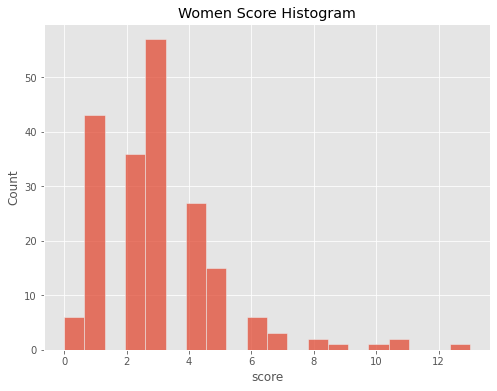

In [9]:
# Plot distribution to check normality 
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(women_res['score'], bins=20, ax=ax)
plt.title('Women Score Histogram')
plt.show();

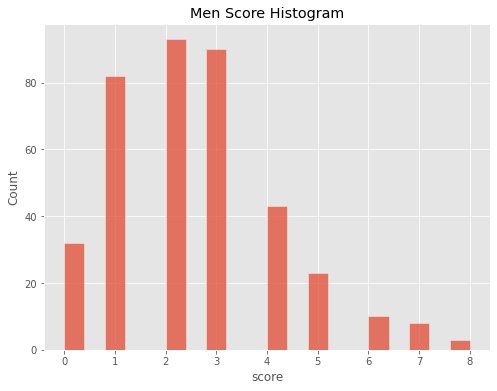

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(men_res['score'], bins=20, ax=ax)
plt.title('Men Score Histogram')
plt.show();

In [11]:
# set significants level
sig_lvl=0.1

# Wilcoxon-Mann-Whitney test 
# (nonparametric alternative to 2 sample unpaired t test)
mwu_res = pingouin.mwu(x=women_res['score'],y=men_res['score'],alternative='greater')
print(mwu_res)

def conclude(pv, signficance_level=0.05):
    if pv >= signficance_level:
        return 'fail to reject'
    if pv < signficance_level:
        return 'reject'
result_dict = {'p_val':mwu_res['p-val'].iloc[0], 'result':conclude(mwu_res['p-val'].iloc[0], signficance_level=sig_lvl)}
print(result_dict)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107  0.126901  0.563451
{'p_val': 0.005106609825443641, 'result': 'reject'}


##### Recall
$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [12]:
# Conclusion
comment = f"Since the Wilcoxon-Mann-Whitney test rejects the null hypothesis at the 10% significant level, \nthe conclusion is the alternaive hypothesis, that The mean number of goals scored in women's international soccer matches \nis greater than men's."
print(comment)

Since the Wilcoxon-Mann-Whitney test rejects the null hypothesis at the 10% significant level, 
the conclusion is the alternaive hypothesis, that The mean number of goals scored in women's international soccer matches 
is greater than men's.
